Simple Linear Regression Model

Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

Load the data

In [2]:
data = pd.read_csv('1.01.+Simple+linear+regression.csv')
#The data variable gets converted into a DATA FRAME

In [3]:
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [4]:
data.describe()
#Pandas method to describe the data we have

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


Create your first regression

In [5]:
# We will create a linear regression which will predict GPA based on SAT score obtained
# Using equation y = b0 + b1x1
# y is the GPA(dependent variable) and x is the SAT score(independent variable)

Defining the dependant and independent variables

In [6]:
y = data['GPA']
x1 = data['SAT']

Explore the data first using some matplot lib code

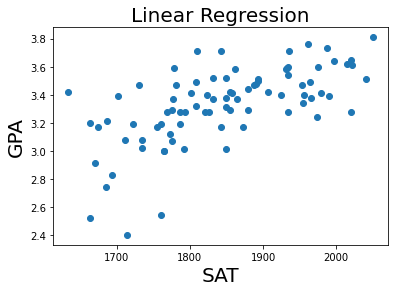

In [7]:
plt.scatter(x1,y)
plt.xlabel('SAT',fontsize = 20)
plt.ylabel('GPA',fontsize = 20)
plt.title('Linear Regression', fontsize=20)
plt.show()

Regression itself

In [8]:
x = sm.add_constant(x1) #y = b0 * x + b1 * x1, where x = 1 (general practise)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Wed, 04 Aug 2021   Prob (F-statistic):           7.20e-11
Time:                        18:05:42   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

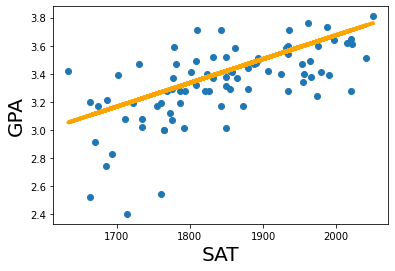

In [9]:
# Plotting the regression line
plt.scatter(x1,y)
yhat = 0.0017*x1 + 0.275
fig = plt.plot(x1,yhat,lw=4,c='orange',label='regression line')
plt.xlabel('SAT',fontsize = 20)
plt.ylabel('GPA',fontsize = 20)
plt.show()
# Notice how it approximates in such a way that more number of values surround the line

In [10]:
prediction_test = pd.DataFrame({'const':1,'SAT' : [1700,1680]})
prediction_test

,const,SAT
0,1,1700
1,1,1680


In [13]:
prediction_test = prediction_test[['const','SAT']]
prediction_test

,const,SAT
0,1,1700
1,1,1680


In [15]:
prediction_test_results = results.predict(prediction_test)
prediction_test_results

0    3.089710
1    3.056596
dtype: float64

In [17]:
test_predictionsdf = pd.DataFrame({'Prediction result':prediction_test_results})
summary_result = prediction_test.join(test_predictionsdf)
summary_result

,const,SAT,Prediction result
0,1,1700,3.089710
1,1,1680,3.056596
